## Probability tables and the categorical distribution
The following cell illustrates drawing from a categorical distribution with on an alphabet, not necessarly $0\dots K-1$.

In [6]:
# Sampling from a Categorical Distribution
a = np.array(sorted(['blue', 'red', 'black', 'yellow']))
pr = np.array([0.2, 0.55, 0.15, 0.1])
N = 100
x = np.random.choice(a, size=N, replace=True, p=pr)


print('Symbols:')
print(a)
print('Probabilities:')
print(pr)
print('{N} realizations:'.format(N=N))
print(x)

Symbols:
['black' 'blue' 'red' 'yellow']
Probabilities:
[ 0.2   0.55  0.15  0.1 ]
100 realizations:
['red' 'black' 'blue' 'red' 'black' 'red' 'blue' 'blue' 'black' 'red'
 'yellow' 'black' 'blue' 'blue' 'blue' 'black' 'blue' 'blue' 'blue' 'red'
 'black' 'blue' 'yellow' 'blue' 'red' 'black' 'red' 'blue' 'blue' 'blue'
 'red' 'blue' 'yellow' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'red'
 'blue' 'black' 'black' 'red' 'blue' 'black' 'blue' 'blue' 'black' 'blue'
 'black' 'blue' 'blue' 'blue' 'blue' 'yellow' 'blue' 'blue' 'blue' 'yellow'
 'blue' 'yellow' 'blue' 'black' 'blue' 'blue' 'blue' 'yellow' 'yellow'
 'black' 'blue' 'blue' 'blue' 'black' 'blue' 'red' 'red' 'blue' 'black'
 'yellow' 'black' 'red' 'blue' 'blue' 'black' 'blue' 'blue' 'blue' 'black'
 'blue' 'red' 'black' 'blue' 'red' 'blue' 'blue' 'red' 'blue' 'blue'
 'yellow']


Often we need the opposite of the above process, that is given a list of elements, we need to count the number of occurences of each symbol. The following method creates such a statistics.

In [7]:
import collections

c = collections.Counter(x)
print(c.most_common())

counts = [e[1] for e in c.most_common()]
symbols = [e[0] for e in c.most_common()]

print('Sorted according to counts')
print(counts)
print(symbols)

# If we require the symbols in sorted order with respect to symbol names, use:
counts = [e[1] for e in sorted(c.most_common())]
symbols = [e[0] for e in sorted(c.most_common())]

print('Sorted according to symbols')
print(counts)
print(symbols)


[('blue', 54), ('black', 20), ('red', 16), ('yellow', 10)]
Sorted according to counts
[54, 20, 16, 10]
['blue', 'black', 'red', 'yellow']
Sorted according to symbols
[20, 54, 16, 10]
['black', 'blue', 'red', 'yellow']



# Continuous Multivariate (todo)

In [3]:
from IPython.display import display, Math, Latex, HTML
import notes_utilities as nut
#import imp
#imp.reload(nut)

print('MV Gaussian')
L = nut.pdf2latex_mvnormal(x=r'x', m=r'\mu',v=r'\Sigma')
#L = nut.pdf2latex_mvnormal(x=r's', m=0,v=r'I')
display(HTML(nut.eqs2html_table(L)))


MV Gaussian


"\begin{eqnarray}\mathcal{N}(x; \mu, \Sigma)\end{eqnarray}","\mathcal{N}(x; \mu, \Sigma)"
\begin{eqnarray}\left|{ 2\pi \Sigma } \right|^{-1/2} \exp\left(-\frac12 ({x} - {\mu} )^\top {\Sigma}^{-1} ({x} - {\mu} ) \right)\end{eqnarray},\left|{ 2\pi \Sigma } \right|^{-1/2} \exp\left(-\frac12 ({x} - {\mu} )^\top {\Sigma}^{-1} ({x} - {\mu} ) \right)
\begin{eqnarray}\exp\left( -\frac{1}{2}\trace {\Sigma}^{-1} {x}{x}^\top + \trace {\Sigma}^{-1} {x}{\mu}^\top -\frac{1}{2}\trace {\Sigma}^{-1} {\mu}{\mu}^\top -\frac{1}{2}\log \left|2{\pi}\Sigma\right|\right)\end{eqnarray},\exp\left( -\frac{1}{2}\trace {\Sigma}^{-1} {x}{x}^\top + \trace {\Sigma}^{-1} {x}{\mu}^\top -\frac{1}{2}\trace {\Sigma}^{-1} {\mu}{\mu}^\top -\frac{1}{2}\log \left|2{\pi}\Sigma\right|\right)
\begin{eqnarray} -\frac{1}{2}\trace {\Sigma}^{-1} {x}{x}^\top + \trace {\Sigma}^{-1} {x}{\mu}^\top -\frac{1}{2}\trace {\Sigma}^{-1} {\mu}{\mu}^\top -\frac{1}{2}\log \left|2{\pi}\Sigma\right|\end{eqnarray},-\frac{1}{2}\trace {\Sigma}^{-1} {x}{x}^\top + \trace {\Sigma}^{-1} {x}{\mu}^\top -\frac{1}{2}\trace {\Sigma}^{-1} {\mu}{\mu}^\top -\frac{1}{2}\log \left|2{\pi}\Sigma\right|


### The Multivariate Gaussian distribution
\begin{align}
\mathcal{N}(x; \mu, \Sigma) &= |2\pi \Sigma|^{-1/2} \exp\left( -\frac{1}{2} (x-\mu)^\top \Sigma^{-1} (x-\mu) \right) \\
& = \exp\left(-\frac{1}{2} x^\top \Sigma^{-1} x + \mu^\top \Sigma^{-1} x   - \frac{1}{2} \mu^\top \Sigma^{-1} \mu   -\frac{1}{2}\log \det(2\pi \Sigma) \right) \\
\end{align}



Draw a vector $x \in \mathbf{R}^N$ where each element $x_i \sim \mathcal{N}(x; 0, 1)$ for $i = 1\dots N$.

$\newcommand{\E}[1]{\left\langle#1\right\rangle}$

Construct 
\begin{align}
y = Ax
\end{align}

The expectation and the variance are obtained by
\begin{align}
\E{y} = \E{Ax} = 0
\end{align}

\begin{align}
\E{y y^\top} = A \E{x x^\top} A^\top = A A^\top
\end{align}

So
\begin{align}
y \sim \mathcal{N}(y; 0, A A^\top)
\end{align}




In two dimensions, a bi-variate Gaussian is conveniently represented by an ellipse. The ellipse shows a contour of equal probability. In particular, if we plot the $3\sigma$ ellipse, $99 \%$ of all the data points should be inside the ellipse.

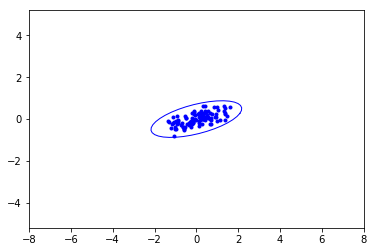

In [4]:
%matplotlib inline

def ellipse_line(A, mu, col='b'):
    '''
    Creates an ellipse from short line segments y = A x + \mu 
    where x is on the unit circle.
    '''
    N = 18
    th = np.arange(0, 2*np.pi+np.pi/N, np.pi/N)
    X = np.array([np.cos(th),np.sin(th)])
    
    Y = np.dot(A, X)
    ln = plt.Line2D(mu[0]+Y[0,:],mu[1]+Y[1,:],markeredgecolor='k', linewidth=1, color=col)
    return ln

N = 100

A = np.random.randn(2,2)
mu = np.zeros(2)
X = np.random.randn(2,N)
Y = np.dot(A,X)

plt.cla()
plt.axis('equal')
ax = plt.gca()
ax.set_xlim(-8,8)
ax.set_ylim(-8,8)

col = 'b'
ln = ellipse_line(3*A, mu, col)
ax.add_line(ln)
#plt.hold(True)
plt.plot(mu[0]+Y[0,:],mu[1]+Y[1,:],'.'+col)

plt.show()

In [9]:
np.dot(A,A.T)

array([[ 1.93017803,  0.84274076],
       [ 0.84274076,  0.49040691]])

When the covariance matrix $\Sigma$ is given, as is typically the case, we need a factorization of 
$\Sigma = W W^\top$. The Cholesky factorization is such a factorization. (Another possibility, whilst computationally more costly, is the matrix square root.)

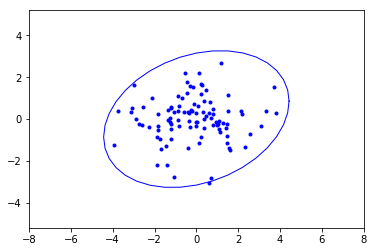

In [12]:
Sigma = np.dot(A, A.T)

W = np.linalg.cholesky(Sigma)
X = np.random.randn(2,N)
Y = np.dot(W,X)

plt.cla()
plt.axis('equal')
ax = plt.gca()
ax.set_xlim(-8,8)
ax.set_ylim(-8,8)

col = 'b'
ln = ellipse_line(3*W, mu, col)
ax.add_line(ln)
#plt.hold(True)
plt.plot(mu[0]+Y[0,:],mu[1]+Y[1,:],'.'+col)

plt.show()

The numpy function __numpy.random.multivariate_normal__ generates samples from a multivariate Gaussian with the given mean and covariance. 

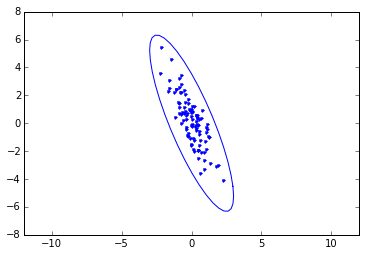

In [19]:

N = 100
Sig = np.dot(A, A.T)
x = np.random.multivariate_normal(mu, Sig, size=N)

plt.cla()
plt.axis('equal')
ax = plt.gca()
ax.set_xlim(-8,8)
ax.set_ylim(-8,8)

plt.plot(x[:,0], x[:,1], 'b.')
ln = ellipse_line(3*A,mu,'b')
plt.gca().add_line(ln)

plt.show()


### Evaluation of the multivariate Gaussian density

The log-density of the multivariate Gaussian has the following exponential form

\begin{align}
\log \mathcal{N}(x; \mu, \Sigma) &= 
-\frac{1}{2}\log \det(2\pi \Sigma) -\frac{1}{2} (x-\mu)^\top \Sigma^{-1} (x - \mu)  
\end{align}

It is tempting to implement these expression as written -- indeed it is useful to do so for debugging purposes. However, this direct method is both inefficient and numerically not very stable. This will be a problem when the dimension of $x$ is high. A direct implementation might be as follows:

In [20]:
def log_mvar_gaussian_inefficient(x, mu, Sig):
    return -0.5*np.log(np.linalg.det(2*np.pi*Sig)) - 0.5*np.sum((x-mu)*np.dot(np.linalg.inv(Sig), x-mu),axis=0)


The evaluation seemingly requires the following steps:

- Evaluation of the log of the determinant of the covariance matrix $\Sigma$
- Inversion of the covariance matrix $\Sigma$ 
- Evaluation of the quadratic form $(x-\mu)^\top \Sigma^{-1} (x - \mu)$

A more efficient implementation uses the following observations:
- The covariance matrix $\Sigma$ is positive semidefinite and has a __Cholesky__ factorization 
\begin{align}
\Sigma = W W^\top
\end{align}
where $W$ is a lower triangular matrix
- The determinant satisfies the following identity

\begin{align}
\det(\Sigma) & = \det(W W^\top) = \det(W) \det(W^\top) = \det(W)^2
\end{align}

- The determinant of the triangular matrix $W$ is simply the product of its diagonal elements $W_{i,i}$ so 

\begin{align}
\log \det(\Sigma) & = 2 \log \det(W) & = 2 \sum_i \log W_{i,i} 
\end{align}

- The quadratic form can be evaluated by the inner product $(x - \mu)^\top u$ where $u = \Sigma^{-1} (x - \mu)$.
Finding $u$ is equivalent to the solution of the linear system 
$$
\Sigma u = (x - \mu) 
$$
and the solution is equivalent to 
$$
 u = (W^\top)^{-1}W^{-1} (x - \mu) 
$$
and can be solved efficiently by backsubstitution as $W$ is triangular. 

This can be implemented as follows

In [21]:
import scipy as sc
import scipy.linalg as la

def log_mvar_gaussian_pdf(x, mu, Sig):
    W = np.linalg.cholesky(Sig)
    z = -np.sum(np.log(2*np.pi)/2 + np.log(np.diag(W))) - 0.5* np.sum((x-mu)*la.cho_solve((W,True), x-mu),axis=0)
    return z

# Dimension of the problem 
N = 2

# Generate K points to evaluate the density at
K = 10
x = np.random.randn(N,K)

# Generate random parameters
mu = np.random.randn(N,1) 
R = np.random.randn(N,N)
Sig = np.dot(R, R.T)

z1 = log_mvar_gaussian_pdf(x, mu, Sig)
z2 = log_mvar_gaussian_inefficient(x, mu, Sig)

print(z1)
print(z2)

[-8.72265771 -6.31543527 -5.4738194  -1.80930712 -2.15963976 -5.54244251
 -3.82657297 -4.16592483 -2.09530621 -8.63078085]
[-8.72265771 -6.31543527 -5.4738194  -1.80930712 -2.15963976 -5.54244251
 -3.82657297 -4.16592483 -2.09530621 -8.63078085]


For the solution of $\Sigma u = b$ where $\Sigma = WW^\top$, we use the implementation in _scipy.linalg.cho_solve_.


In [24]:
import scipy.linalg as la

N = 2
# Construct a random positive definite matrix
R = np.random.randn(N,N)
Sig = np.dot(R, R.T)
b = np.random.randn(N,1)

# Direct implementation -- inefficient
u_direct = np.matrix(np.linalg.inv(Sig))*b

# Efficient implementation
W = np.linalg.cholesky(Sig)
u_efficient = la.cho_solve((W,True), b)

# Verify that both give the same result
print(u_direct)
print(u_efficient)

[[-0.40649925]
 [ 0.39775871]]
[[-0.40649925]
 [ 0.39775871]]


## Dirichlet Distribution

The Dirichlet distribution is a distribution over probability vectors.

$$
\mathcal{D}(w_{1:N}; \alpha_{1:N}) = \frac{\Gamma(\sum_i \alpha_i)}{\prod_i \Gamma(\alpha_i) } \prod w_i^{\alpha_i-1}
$$

In [13]:
from IPython.display import display, Math, Latex, HTML
import notes_utilities as nut
from importlib import reload
reload(nut)
Latex('$\DeclareMathOperator{\trace}{Tr}$')



L = nut.pdf2latex_dirichlet(x=r'h', N=r'J', i='j',a=r'\alpha')
display(HTML(nut.eqs2html_table(L)))



\begin{eqnarray}\mathcal{D}(h_{1:J}; \alpha_{1:J} )\end{eqnarray},\mathcal{D}(h_{1:J}; \alpha_{1:J} )
\begin{eqnarray}\frac{\Gamma(\sum_{j} \alpha_{j})}{\prod_{j} \Gamma(\alpha_{j})} \prod_{{j}=1}^{J} {h}_{j}^{\alpha_{j} - 1} \end{eqnarray},\frac{\Gamma(\sum_{j} \alpha_{j})}{\prod_{j} \Gamma(\alpha_{j})} \prod_{{j}=1}^{J} {h}_{j}^{\alpha_{j} - 1}
\begin{eqnarray}\exp\left(\log{\Gamma(\sum_{j} \alpha_{j})} - {\sum_{j} \log \Gamma(\alpha_{j})} + \sum_{{j}=1}^{J} (\alpha_{j} - 1) \log{h}_{j} \right)\end{eqnarray},\exp\left(\log{\Gamma(\sum_{j} \alpha_{j})} - {\sum_{j} \log \Gamma(\alpha_{j})} + \sum_{{j}=1}^{J} (\alpha_{j} - 1) \log{h}_{j} \right)
\begin{eqnarray}\log{\Gamma(\sum_{j} \alpha_{j})} - {\sum_{j} \log \Gamma(\alpha_{j})} + \sum_{{j}=1}^{J} (\alpha_{j} - 1) \log{h}_{j} \end{eqnarray},\log{\Gamma(\sum_{j} \alpha_{j})} - {\sum_{j} \log \Gamma(\alpha_{j})} + \sum_{{j}=1}^{J} (\alpha_{j} - 1) \log{h}_{j}


In [22]:
import numpy as np

np.random.dirichlet(3*np.array([1,2,3]))

array([ 0.09189517,  0.22940425,  0.67870058])

## Wishart

https://en.wikipedia.org/wiki/Wishart_distribution

The Wishart distribution appears as the posterior of the precision matrix of a multivariate Gaussian.

A positive semidefinite matrix $X \in \mathbb{R}^{k \times k}$ is said to have a Wishart density 
if

\begin{eqnarray}
{\cal W}(X; \nu, S) & = & \exp\left( \frac{\nu - k - 1}2 \log |X| - \frac{1}2\trace S^{-1}X - \frac{\nu}{2} \log |S| - \log Z   \right) \\
Z & = &   2^{\nu k /2} \pi^{k(k-1)/4} \prod_{i=1}^k \Gamma(\frac{\nu + 1 - i}2) \\
& = & 2^{\nu k /2} \Gamma_k(\nu/2)
\end{eqnarray}
The link to Gamma ${\cal G}$ distribution is established by

\begin{eqnarray}
{\cal W}(X; \nu, S) & = & \exp\left( \frac{\nu - k - 1}2 \log |X| - \trace (2 S)^{-1}X - \frac{\nu}{2} \log |2 S | - \log \Gamma_k(\nu/2)  \right) 
\end{eqnarray}

Alternative parametrization with $a = \nu/2$ and $B^{-1} = 2 S$.
\begin{eqnarray}
{\cal W}(X; 2a, B^{-1}/2) & = & \exp( {(a - (k + 1)/2)} \log |X| &- \trace B X &- \log \Gamma_k(a) &+ a \log |B|   ) \\
\mathcal{G}(x; a, b) & = & \exp(({a} - 1)\log x &- {b}{x} &- \log \Gamma({a}) &+ {a} \log {b})
\end{eqnarray}

$\newcommand{\E}[1]{\langle#1\rangle}$

\begin{eqnarray}
\E{X} & = & \nu S = a B^{-1}
\end{eqnarray}


In [14]:
from IPython.display import display, Math, Latex, HTML
import notes_utilities as nut
#import imp
#imp.reload(nut)

print('MV Gaussian')
L = nut.pdf2latex_mvnormal(x=r's', m=r'\mu',v=r'\Sigma')
#L = nut.pdf2latex_mvnormal(x=r's', m=0,v=r'I')
display(HTML(nut.eqs2html_table(L)))

print('Wishart')
L = nut.pdf2latex_wishart(X=r'X', nu=r'\nu', S=r'S', k=r'k', W='W')
display(HTML(nut.eqs2html_table(L)))

print('Inverse Wishart')
L = nut.pdf2latex_invwishart(X=r'\Sigma', nu=r'\nu', S=r'S', k=r'k', IW='IW')
#L = nut.pdf2latex_mvnormal(x=r's', m=0,v=r'I')
display(HTML(nut.eqs2html_table(L)))




MV Gaussian


"\begin{eqnarray}\mathcal{N}(s; \mu, \Sigma)\end{eqnarray}","\mathcal{N}(s; \mu, \Sigma)"
\begin{eqnarray}\left|{ 2\pi \Sigma } \right|^{-1/2} \exp\left(-\frac12 ({s} - {\mu} )^\top {\Sigma}^{-1} ({s} - {\mu} ) \right)\end{eqnarray},\left|{ 2\pi \Sigma } \right|^{-1/2} \exp\left(-\frac12 ({s} - {\mu} )^\top {\Sigma}^{-1} ({s} - {\mu} ) \right)
\begin{eqnarray}\exp\left( -\frac{1}{2}\trace {\Sigma}^{-1} {s}{s}^\top + \trace {\Sigma}^{-1} {s}{\mu}^\top -\frac{1}{2}\trace {\Sigma}^{-1} {\mu}{\mu}^\top -\frac{1}{2}\log \left|2{\pi}\Sigma\right|\right)\end{eqnarray},\exp\left( -\frac{1}{2}\trace {\Sigma}^{-1} {s}{s}^\top + \trace {\Sigma}^{-1} {s}{\mu}^\top -\frac{1}{2}\trace {\Sigma}^{-1} {\mu}{\mu}^\top -\frac{1}{2}\log \left|2{\pi}\Sigma\right|\right)
\begin{eqnarray} -\frac{1}{2}\trace {\Sigma}^{-1} {s}{s}^\top + \trace {\Sigma}^{-1} {s}{\mu}^\top -\frac{1}{2}\trace {\Sigma}^{-1} {\mu}{\mu}^\top -\frac{1}{2}\log \left|2{\pi}\Sigma\right|\end{eqnarray},-\frac{1}{2}\trace {\Sigma}^{-1} {s}{s}^\top + \trace {\Sigma}^{-1} {s}{\mu}^\top -\frac{1}{2}\trace {\Sigma}^{-1} {\mu}{\mu}^\top -\frac{1}{2}\log \left|2{\pi}\Sigma\right|


Wishart


"\begin{eqnarray}\mathcal{W}_k(X; \nu, S )\;\;\;\Gamma_k(\nu/2) = \pi^{k(k-1)/4} \prod_{i=1}^{k} \Gamma(\nu/2 - (i-1)/2)\end{eqnarray}","\mathcal{W}_k(X; \nu, S )\;\;\;\Gamma_k(\nu/2) = \pi^{k(k-1)/4} \prod_{i=1}^{k} \Gamma(\nu/2 - (i-1)/2)"
\begin{eqnarray}\frac{ \left|X\right|^{{( { \nu } - k - 1)}/{2}} }{ |2S|^{\nu /2} \Gamma_k(\nu/2) } \exp\left( - \trace (2S)^{-1} X\right)\end{eqnarray},\frac{ \left|X\right|^{{( { \nu } - k - 1)}/{2}} }{ |2S|^{\nu /2} \Gamma_k(\nu/2) } \exp\left( - \trace (2S)^{-1} X\right)
\begin{eqnarray}\exp\left(\frac{ { \nu } - k - 1}{2} \log \left|X\right| - \trace (2S)^{-1} X - \frac{ \nu }{2}\log |2S| - \log\Gamma_k(\nu/2)\right)\end{eqnarray},\exp\left(\frac{ { \nu } - k - 1}{2} \log \left|X\right| - \trace (2S)^{-1} X - \frac{ \nu }{2}\log |2S| - \log\Gamma_k(\nu/2)\right)
\begin{eqnarray}\frac{ { \nu } - k - 1}{2} \log \left|X\right| - \trace (2S)^{-1} X - \frac{ \nu }{2}\log |2S| - \log\Gamma_k(\nu/2)\end{eqnarray},\frac{ { \nu } - k - 1}{2} \log \left|X\right| - \trace (2S)^{-1} X - \frac{ \nu }{2}\log |2S| - \log\Gamma_k(\nu/2)


Inverse Wishart


"\begin{eqnarray}\mathcal{IW}_k(\Sigma; \nu, S )\;\;\;\Gamma_k(\nu/2) = \pi^{k(k-1)/4} \prod_{i=1}^{k} \Gamma(\nu/2 - (i-1)/2)\end{eqnarray}","\mathcal{IW}_k(\Sigma; \nu, S )\;\;\;\Gamma_k(\nu/2) = \pi^{k(k-1)/4} \prod_{i=1}^{k} \Gamma(\nu/2 - (i-1)/2)"
\begin{eqnarray}\frac{ |S/2|^{ \nu /2} }{\left|\Sigma\right|^{{( { \nu } + k + 1)}/{2}} \Gamma_k(\nu/2) } \exp\left( - \trace (S/2) \Sigma^{-1}\right)\end{eqnarray},\frac{ |S/2|^{ \nu /2} }{\left|\Sigma\right|^{{( { \nu } + k + 1)}/{2}} \Gamma_k(\nu/2) } \exp\left( - \trace (S/2) \Sigma^{-1}\right)
\begin{eqnarray}\exp\left(-\frac{ { \nu } + k + 1}{2} \log \left|\Sigma\right| - \trace (S/2) \Sigma^{-1} + \frac{ \nu }{2}\log |S/2| - \log\Gamma_k(\nu/2)\right)\end{eqnarray},\exp\left(-\frac{ { \nu } + k + 1}{2} \log \left|\Sigma\right| - \trace (S/2) \Sigma^{-1} + \frac{ \nu }{2}\log |S/2| - \log\Gamma_k(\nu/2)\right)
\begin{eqnarray}-\frac{ { \nu } + k + 1}{2} \log \left|\Sigma\right| - \trace (S/2) \Sigma^{-1} + \frac{ \nu }{2}\log |S/2| - \log\Gamma_k(\nu/2)\end{eqnarray},-\frac{ { \nu } + k + 1}{2} \log \left|\Sigma\right| - \trace (S/2) \Sigma^{-1} + \frac{ \nu }{2}\log |S/2| - \log\Gamma_k(\nu/2)


## Inverse Wishart

https://en.wikipedia.org/wiki/Inverse-Wishart_distribution

The inverse Wishart is a matrix variate distribution and appears as the posterior distribution of a covariance matrix of a Gaussian density. More precisely, it appears as the distribution of $U U^T$ where each column of the $k \times \nu$ matrix $U$ is distributed independently according to $u_i \sim \mathcal{N}(U; 0, S)$ for $i=1\dots \nu$.

The inverse of a Wihart variate matrix is said to be inverse Wishart distributed

\begin{eqnarray}
{\cal IW}(X; \nu, S) & = & \exp\left( - \frac{\nu + k + 1}2 \log |X| - \frac{1}2\trace S X^{-1} + \frac{\nu}{2}\log |S| - \log Z  \right) \\
Z & = &  2^{\nu k /2} \pi^{k(k-1)/4} \prod_{i=1}^k \Gamma(\frac{\nu + 1 - i}2) \\
 & = & 2^{\nu k /2} \Gamma_k(\nu/2)
\end{eqnarray}
The link to Inverse Gamma ${\cal IG}$ distribution is established by
\begin{eqnarray}
{\cal IW}(X; \nu, S) & = & \exp\left( - \frac{\nu + k + 1}2 \log |X| - \trace (S/2) X^{-1} + \frac{\nu}{2}\log |S/2| - \log\Gamma_k(\nu/2) \right) 
\end{eqnarray}

Alternative with $a = \nu/2$  and $B = S/2$.

\begin{eqnarray}
{\cal IW}(X; 2a, 2B) & = & \exp( - (a + (k+1)/2) \log |X| &- \trace BX^{-1}  &- \log\Gamma_k(a) &+ a\log |B|) \\
{\cal IG}(x; a, b) & = & \exp(-({a} + 1)\log x          &- \frac{{b}}{{x}} &- \log\Gamma({a}) &+ {a} \log {b})
\end{eqnarray}

\begin{eqnarray}
\E{X} & = & S/(\nu - k - 1) = B/(a - (k+1)/2)
\end{eqnarray}


### Aside: The multigamma function

https://en.wikipedia.org/wiki/Multivariate_gamma_function

The multigamma function is the result of the integral
$$
\Gamma_k(\alpha) = \int_{W \succ 0} e^{-tr(W)} |W|^{\alpha - (k+1)/2} dW
$$
where the $W$ is a positive definite $k\times k$ matrix (denoted as $W \succ 0$). The scalar parameter $\alpha$ is positive and 
$\alpha > (k+1)/2$. It turns out that this integral can be evaluated as
$$
\Gamma_k(\alpha) = \pi^{k(k-1)/4} \prod_{i=1}^{k} \Gamma(\alpha - (i-1)/2)
$$

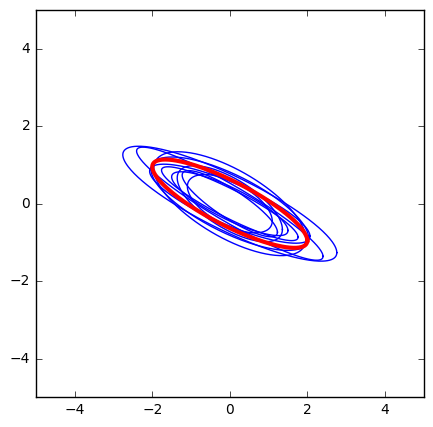

In [135]:
# Generate Wishart random variables

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd

from scipy.stats import wishart, invwishart
from notes_utilities import pnorm_ball_line

k = 2
#S = np.eye(k)
#S = np.diag([2,3])
nu = 8
S = np.array([[4,-1.9],[-1.9,1.3]])/nu

plt.figure(figsize=(5,5))

ax = plt.gca()

N = 10
for i in range(N):
    W = wishart.rvs(nu, S, random_state=None)
    ln = pnorm_ball_line(np.linalg.cholesky(W),color='b',linewidth=1)
    ax.add_line(ln)


ln = pnorm_ball_line(np.linalg.cholesky(nu*S),color='r')
ax.add_line(ln)

Lim = 5
ax.set_xlim([-Lim,Lim])
ax.set_ylim([-Lim,Lim])
plt.show()


## Evaluating the Wishart density

In [154]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd

from scipy.stats import wishart, invwishart
from scipy.special import multigammaln
from notes_utilities import pnorm_ball_line

k = 2
nu = 8
S = np.array([[4,-1.9],[-1.9,1.3]])/nu

X = np.random.randn(k,k)
X = X.T.dot(X)

cX = np.linalg.cholesky(X)
logdetX = 2*np.sum(np.log(np.diag(cX)))
c2S = np.linalg.cholesky(2*S)
logdet2S = 2*np.sum(np.log(np.diag(c2S)))
cS2 = c2S/2.0                       # np.linalg.cholesky(S/2)
logdetS2 =  logdet2S - 4*np.log(2)  # 2*np.sum(np.log(np.diag(cS2)))

logpdf_wishart    =  (nu - k - 1)/2.*logdetX - np.trace(np.linalg.solve(2*S, X)) - nu/2*logdet2S - multigammaln(nu/2, k)
logpdf_invwishart = -(nu + k + 1)/2.*logdetX - np.trace(np.linalg.solve(X, S/2)) + nu/2*logdetS2 - multigammaln(nu/2, k)

print(logpdf_wishart)
print(wishart.logpdf(X, nu, S))

print(logpdf_invwishart)
print(invwishart.logpdf(X, nu, S))

#\exp\left( \frac{\nu - k - 1}2 \log |X| - \trace (2 S)^{-1}X - \frac{\nu}{2} \log |2 S | - \log \Gamma_k(\nu/2)  \right) 


-11.0024155955
-11.0024155955
-19.51810485
-19.51810485


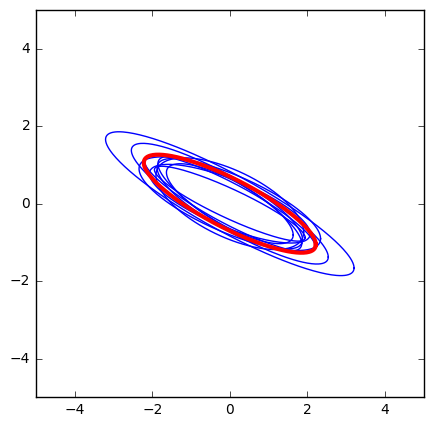

In [98]:
# Generate Inverse Wishart random variables

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd

from scipy.stats import wishart, invwishart
from notes_utilities import pnorm_ball_line

k = 2
#S = np.eye(k)
#S = np.diag([2,3])
nu = 16
S = np.array([[4,-1.9],[-1.9,1.3]])*nu

plt.figure(figsize=(5,5))

ax = plt.gca()

N = 10
for i in range(N):
    IW = invwishart.rvs(nu, S, random_state=None)
    ln = pnorm_ball_line(np.linalg.cholesky(IW),color='b',linewidth=1)
    ax.add_line(ln)


ln = pnorm_ball_line(np.linalg.cholesky(S/(nu-k-1)),color='r')
ax.add_line(ln)

Lim = 5
ax.set_xlim([-Lim,Lim])
ax.set_ylim([-Lim,Lim])
plt.show()


In [49]:
import inspect
import scipy as sc
from scipy.stats import wishart

#print(inspect.getsource(sc.stats._multivariate.wishart_gen))
print(inspect.getsource(sc.special.multigammaln))

#sps.special.multigammaln


def multigammaln(a, d):
    r"""Returns the log of multivariate gamma, also sometimes called the
    generalized gamma.

    Parameters
    ----------
    a : ndarray
        The multivariate gamma is computed for each item of `a`.
    d : int
        The dimension of the space of integration.

    Returns
    -------
    res : ndarray
        The values of the log multivariate gamma at the given points `a`.

    Notes
    -----
    The formal definition of the multivariate gamma of dimension d for a real
    `a` is

    .. math::

        \Gamma_d(a) = \int_{A>0} e^{-tr(A)} |A|^{a - (d+1)/2} dA

    with the condition :math:`a > (d-1)/2`, and :math:`A > 0` being the set of
    all the positive definite matrices of dimension `d`.  Note that `a` is a
    scalar: the integrand only is multivariate, the argument is not (the
    function is defined over a subset of the real set).

    This can be proven to be equal to the much friendlier equation

    .. math::

        \Gamma_d(a) = \pi^{

In [17]:
%connect_info

{
  "ip": "127.0.0.1",
  "stdin_port": 56571,
  "hb_port": 56573,
  "signature_scheme": "hmac-sha256",
  "transport": "tcp",
  "control_port": 56572,
  "iopub_port": 56570,
  "shell_port": 56569,
  "key": "9998ad8d-5daa-48bd-8307-45ca7c833fd7"
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing kernel-0612b3c2-77a2-4d55-b991-57a41d566995.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.


Some useful functions from np.random

We can get a specific random number state and generate data from it.

In [1]:
import numpy as np

u = np.random.RandomState()
print(u.permutation(10))

lam = 3;
print(u.exponential(lam))


[0 2 8 1 7 6 4 9 3 5]
1.1245667884520933
